In [151]:
using LinearAlgebra;
using StaticArrays;
using Makie
using CairoMakie
using Printf
using Markdown


In [152]:
"""
    H(k, M) -> Matrix{Complex{Float64}}
    Hamiltonian for the SSH Model 
"""
@inline function H(k::Float64, M::Float64)
    fk = 1.0 + M * exp(im * k); fkc = conj(fk);
    [0.0 fk; fkc 0.0]
end

@inline function evals(k::Float64, M::Float64)
    fk = 1.0 + M * exp(im * k); fkc = conj(fk);
    eigvals([0.0 fk; fkc 0.0])
end

@inline function eigensystem_SSH(k::Float64, M::Float64)
    fk = 1.0 + M * exp(im * k); fkc = conj(fk);
    eigen(Hermitian([0.0 fk; fkc 0.0]))
end

"""
    plot_band_structure(M::Float64)
    Plot the band structure of the SSH model
"""

function plot_bands_SSH(;M::Float64)
    ks = range(-π, π, length = 100)
    E = evals.(ks, Ref(M))
    valence = map(x -> x[1], E)
    conduct = map(x -> x[2], E)
    f = Figure()
    ax = Axis(f[1, 1], title="SSH Chain Bands, M = $M")
    lines!(ax, ks, valence, color = :blue, linewidth = 2)
    lines!(ax, ks, conduct, color = :blue, linewidth = 2)
    f
    #scatter(ks, valence, color=:blue, linewidth=2)
end

plot_bands_SSH (generic function with 2 methods)

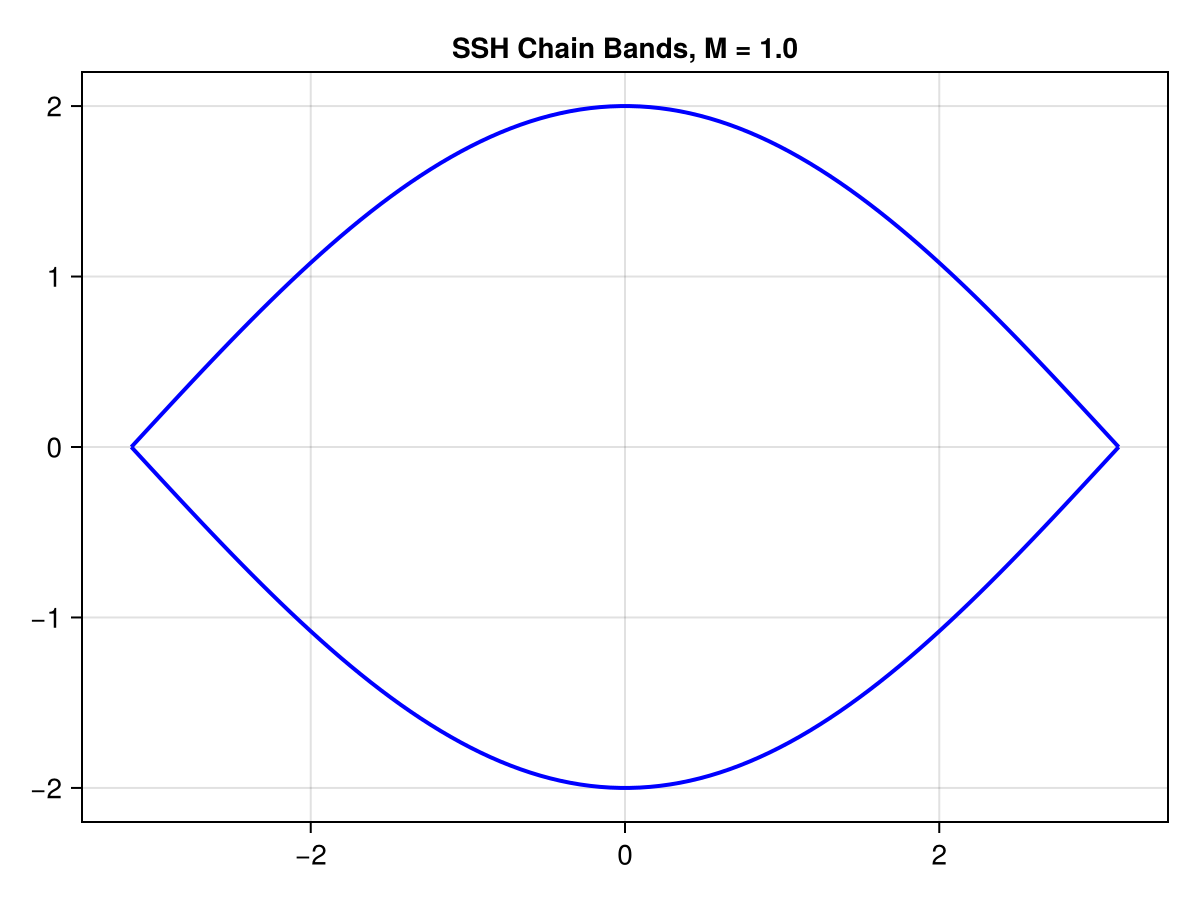

In [153]:
plot_bands_SSH(M = 1.0)

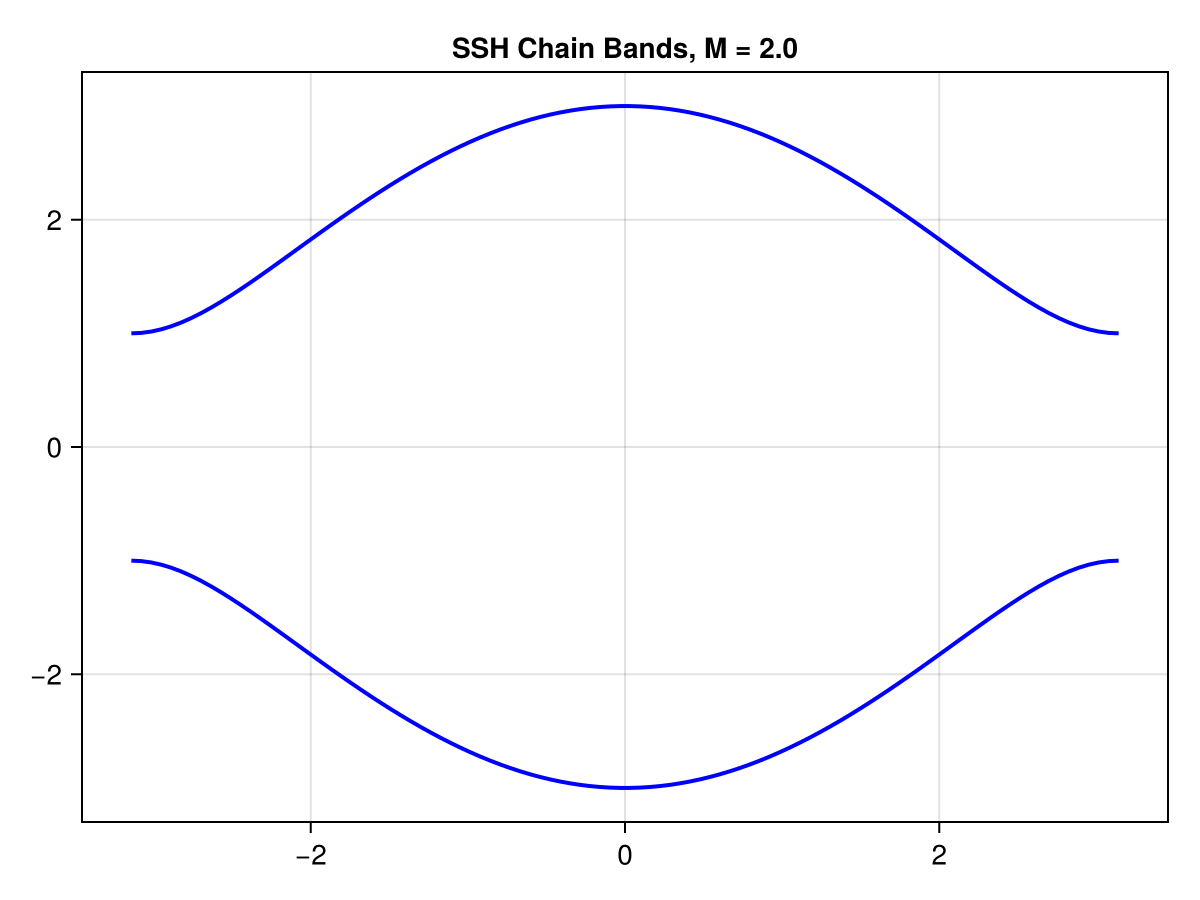

In [154]:
plot_bands_SSH(M = 2.0)

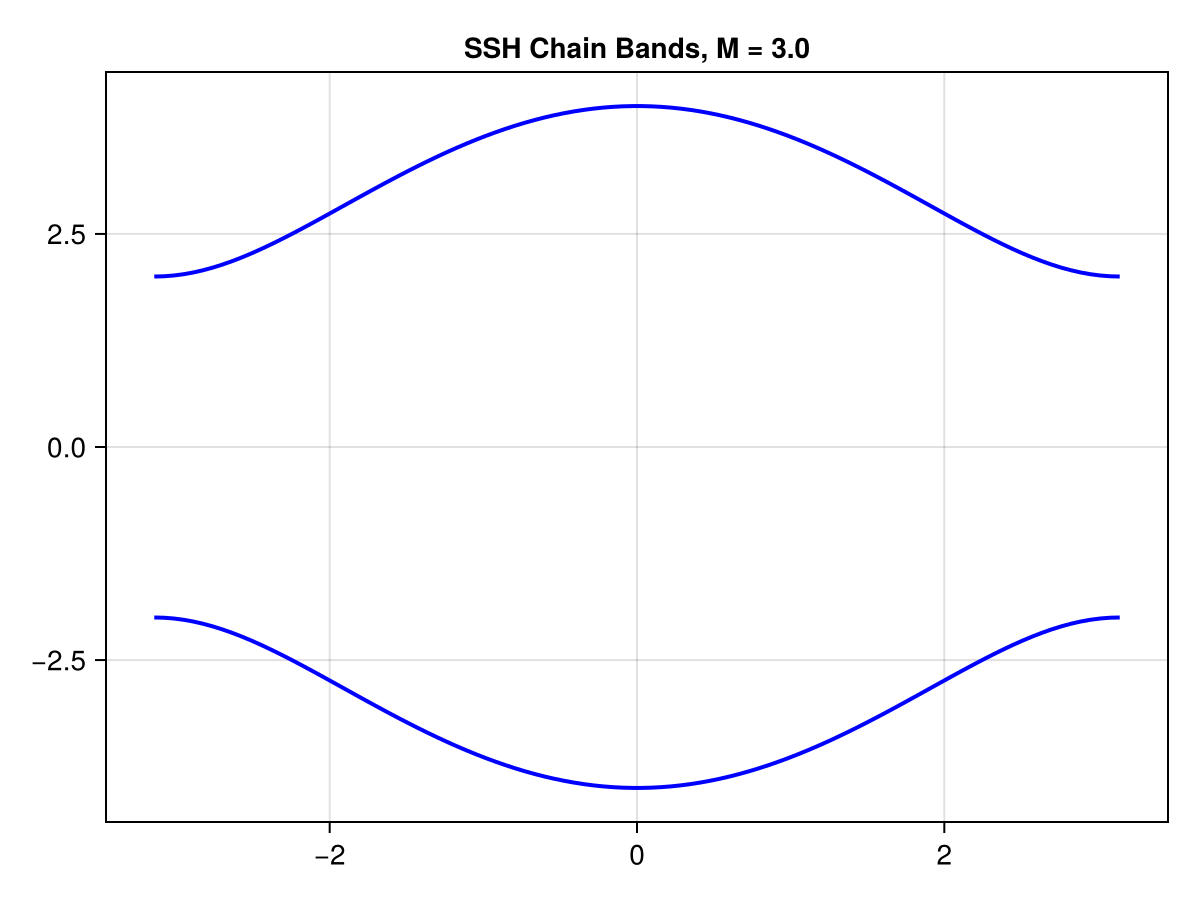

In [155]:
plot_bands_SSH(M = 3.0)

## Now, we calculate the loop integral of the Berry connection ##
### Start with the overlaps \Lambda i.e. Form factors ### 

First, we calculate the product of valence and conduction band projectors along the BZ = S^1 
Thi is a complex number. At the end of the calculation, we calculate its phase. We are not interested in the magnitude. 
We need to show that the phase is either pi or 0 

In [156]:
function prod_projectors(M::Float64; band::Int64 = 1, nps::Int64 = 100)
    ks = range(-π, π, length = nps)
    # spectrum 
    spectrum_k = eigensystem_SSH.(ks, Ref(M))
    # get eigenmodes 
    U_grid     = map(x -> x.vectors, spectrum_k)
    U_band     = map(x -> x[:, band], U_grid)

    # so far, we have the eigenmodes of the band at all points of the momentum space grid
    res::ComplexF64 = 1.0 + 0.0 * im  
    for n ∈ 1 : nps
        res *= U_band[n]' * U_band[mod1(n + 1, nps)]
    end
    abs(angle(res))
end

prod_projectors (generic function with 2 methods)

In [157]:
prod_projectors(2.0, band = 1, nps = 100)

3.1415926535897927

In [158]:
function plot_topological_index_on_parameterspace()
    # grid in parameter space 
    ps = range(0.0, 2.0, length = 100)
    # compute the topological index for each point in the parameter space
    Ws = prod_projectors.(ps, band = 1, nps = 100) / pi
    f = Figure()
    ax = Axis(f[1, 1], title="Topological Index of SSH Model over parameter space. ")
    ax.xlabel = L"M"
    ax.ylabel = "Toplogical Index, Arg(W) / π"
    lines!(ax, ps, Ws, color = :blue, linewidth = 2)
    f
end

plot_topological_index_on_parameterspace (generic function with 1 method)

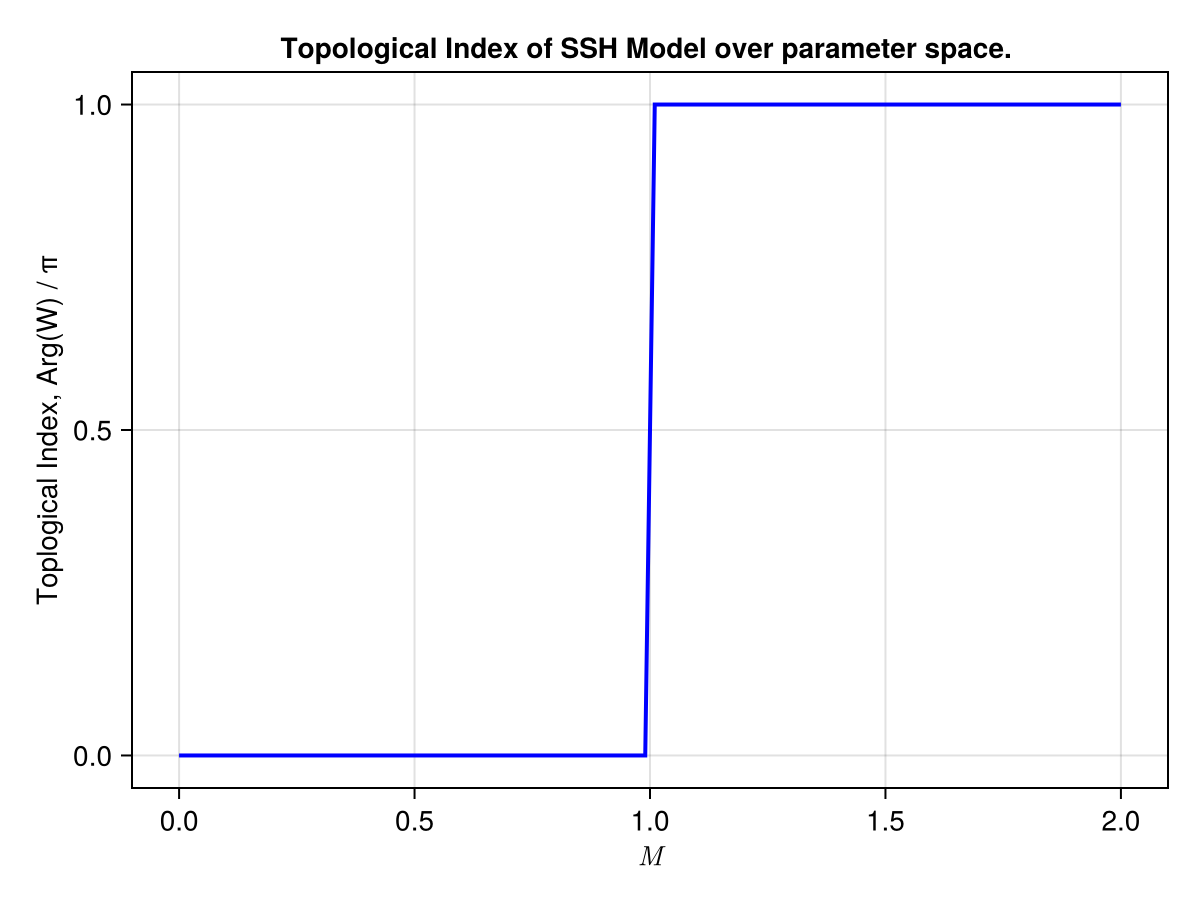

In [159]:
plot_topological_index_on_parameterspace()